In [2]:
import psycopg2, geopandas
from sqlalchemy import create_engine

# Get the database connection
connection = psycopg2.connect(
    host="localhost",
    database="censusdata",
    user="user",
    password="password",
    port=5432,
)
connection.autocommit = True
cursor = connection.cursor()


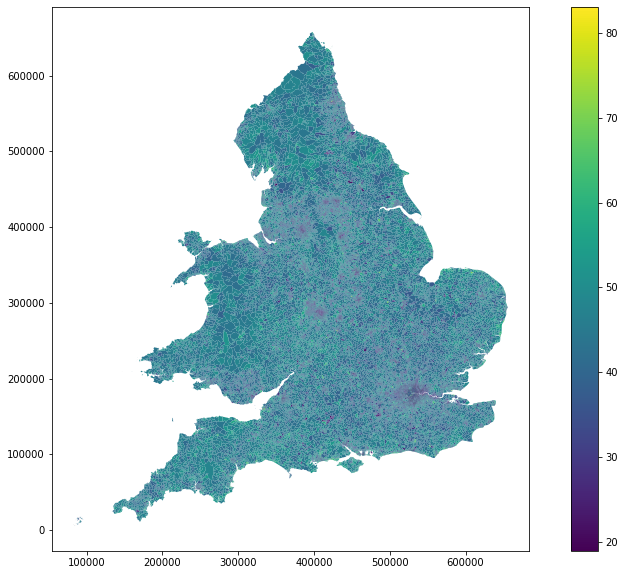

In [4]:
# Retrieve the Mean age for all areas of England and Wales and plot on to a map
# A quick look at the output and the younger ages seem to be grouped around major cities
sql = '''
select a.*, oa.*, a.value as x
from  censusdata as a
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS102EW0018'
order by x
'''
df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(15, 10), legend=True);

In [5]:
# Areas with the highest mean age
df.tail(10)

# Area E00157368 in Waverley has the higest mean age at 83 years


geographycode          key  value     type  OBJECTID     OA11CD  \
181398     E00103327  KS102EW0018     77  KS102EW    100416  E00103327   
181399     E00080142  KS102EW0018     78  KS102EW     77729  E00080142   
181400     E00064524  KS102EW0018     79  KS102EW     62534  E00064524   
181401     E00121455  KS102EW0018     79  KS102EW    118155  E00121455   
181402     E00004097  KS102EW0018     80  KS102EW      4016  E00004097   
181403     E00084145  KS102EW0018     80  KS102EW     81625  E00084145   
181404     E00074327  KS102EW0018     82  KS102EW     72043  E00074327   
181405     E00022899  KS102EW0018     82  KS102EW     22227  E00022899   
181406     E00172074  KS102EW0018     82  KS102EW    167049  E00172074   
181407     E00157368  KS102EW0018     83  KS102EW    153183  E00157368   

          LAD11CD    LAD16CD                      LAD16NM     Shape__Are  \
181398  E07000049  E07000049                  East Dorset    8794.511597   
181399  E06000033  E06000033              Southend-on-Sea    6618.637886   
181400  E06000010  E06000010  Kingston upon Hull, City of   26019.185913   
181401  E07000104  E07000241              Welwyn Hatfield   44455.402130   
181402  E09000006  E09000006                      Bromley   13085.135834   
181403  E06000041  E06000041                    Wokingham   29878.290657   
181404  E06000023  E06000023             Bristol, City of  102850.138645   
181405  E09000032  E09000032                   Wandsworth   28442.205017   
181406  E06000026  E06000026                     Plymouth    6132.726201   
181407  E07000216  E07000216                     Waverley  127178.816040   

         Shape__Len                                           geometry   x  
181398   372.780381  POLYGON ((407906.329 100325.631, 407905.607 10...  77  
181399   411.818310  POLYGON ((586888.701 185243.913, 586887.991 18...  78  
181400   953.877772  POLYGON ((507476.462 430594.890, 507468.470 43...  79  
181401  1075.322500  POLYGON ((523744.632 213481.172, 523736.636 21...  79  
181402   536.830943  POLYGON ((538958.966 165499.855, 538953.714 16...  80  
181403   726.661759  POLYGON ((481084.000 169117.096, 481084.000 16...  80  
181404  1831.174987  POLYGON ((357299.896 176339.502, 357299.060 17...  82  
181405   754.075936  POLYGON ((528104.897 173926.462, 528098.375 17...  82  
181406   319.000686  POLYGON ((251715.876 53198.109, 251673.547 531...  82  
181407  2198.248704  POLYGON ((504057.191 138553.161, 504056.663 13...  83

In [7]:
# Mean age of OAs in Waverley
df[df['LAD16NM'] == 'Waverley']
# From the data there seems to be areas in quite close proximity that have very different mean ages. 
# Might help if we could see this pictorially

geographycode          key  value     type  OBJECTID     OA11CD  \
4          E00167786  KS102EW0018     19  KS102EW    163160  E00167786   
542        E00167784  KS102EW0018     23  KS102EW    163158  E00167784   
4128       E00157598  KS102EW0018     28  KS102EW    153410  E00157598   
6728       E00157454  KS102EW0018     29  KS102EW    153268  E00157454   
11815      E00157576  KS102EW0018     30  KS102EW    153390  E00157576   
...              ...          ...    ...      ...       ...        ...   
177398     E00157476  KS102EW0018     55  KS102EW    153290  E00157476   
177679     E00157706  KS102EW0018     56  KS102EW    153515  E00157706   
177730     E00157478  KS102EW0018     56  KS102EW    153292  E00157478   
179575     E00157482  KS102EW0018     59  KS102EW    153296  E00157482   
181407     E00157368  KS102EW0018     83  KS102EW    153183  E00157368   

          LAD11CD    LAD16CD   LAD16NM    Shape__Are    Shape__Len  \
4       E07000216  E07000216  Waverley  4.150189e+05   4228.891028   
542     E07000216  E07000216  Waverley  9.288822e+05   7278.733134   
4128    E07000216  E07000216  Waverley  5.265452e+04   1029.394464   
6728    E07000216  E07000216  Waverley  6.028459e+06  13784.124425   
11815   E07000216  E07000216  Waverley  9.275184e+05   5054.489815   
...           ...        ...       ...           ...           ...   
177398  E07000216  E07000216  Waverley  1.231900e+06   7634.613704   
177679  E07000216  E07000216  Waverley  6.042809e+05   5089.904491   
177730  E07000216  E07000216  Waverley  6.589608e+04   1523.525284   
179575  E07000216  E07000216  Waverley  8.462110e+04   1922.046768   
181407  E07000216  E07000216  Waverley  1.271788e+05   2198.248704   

                                                 geometry   x  
4       POLYGON ((496252.910 145691.213, 496252.000 14...  19  
542     POLYGON ((505892.856 140097.145, 505776.240 14...  23  
4128    POLYGON ((497839.752 145956.485, 497833.670 14...  28  
6728    POLYGON ((510650.096 142737.907, 510649.594 14...  29  
11815   POLYGON ((484239.288 142854.997, 484239.224 14...  30  
...                                                   ...  ..  
177398  POLYGON ((483248.526 148266.570, 483323.735 14...  55  
177679  POLYGON ((488432.521 137431.535, 488412.994 13...  56  
177730  POLYGON ((484270.094 146725.500, 484247.649 14...  56  
179575  POLYGON ((484270.094 146725.500, 484293.480 14...  59  
181407  POLYGON ((504057.191 138553.161, 504056.663 13...  83  

[387 rows x 13 columns]

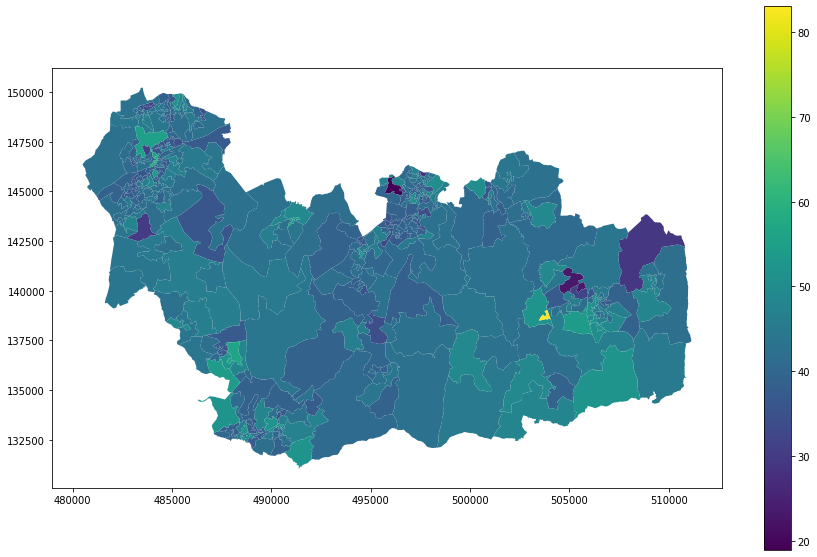

In [8]:
# Mean ages in Waverley map
(df[df['LAD16NM'] == 'Waverley']).plot(column='x', figsize=(15, 10), legend=True);


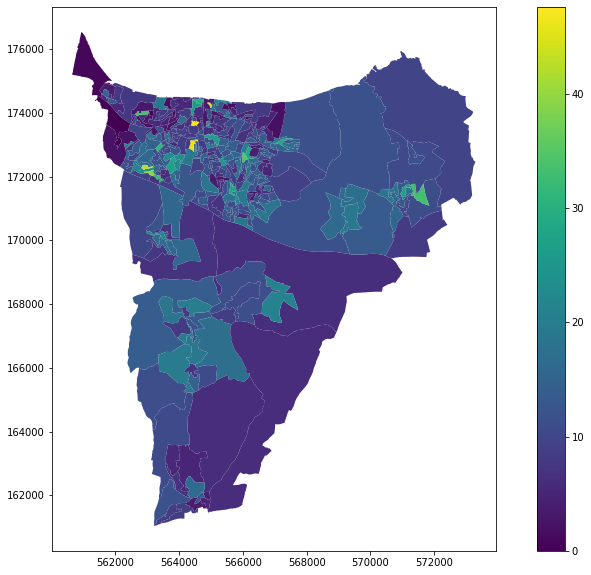

In [11]:
# Household composition - % one person house holds of over 65s
sql = '''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS105EW0001'
and b.key ='KS105EW0002'
and oa."LAD16NM"='Gravesham'
'''
df = geopandas.GeoDataFrame.from_postgis(sql, connection,  geom_col='geometry') 
df.plot(column='x', figsize=(15, 10), legend=True);

In [ ]:
# Mean age
# New ONS tables
sql = '''
select a.*, oa.*, a.value as x
from  censusdata as a
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS102EW0018'
order by x desc
'''
df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(15, 10), legend=True)

<AxesSubplot:>

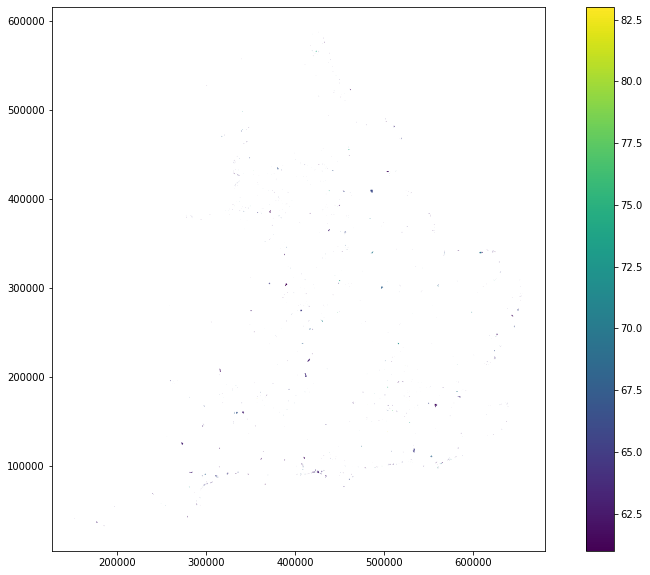

In [17]:
df.head(1000).plot(column='x', figsize=(15, 10), legend=True)

<AxesSubplot:>

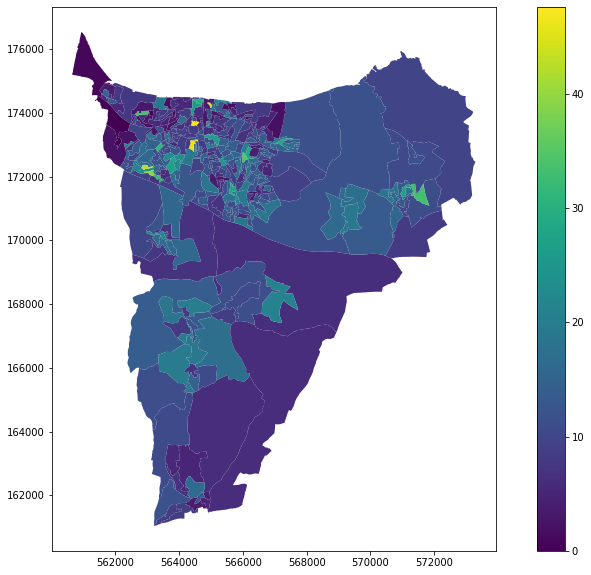

In [13]:
df.tail(1000).plot(column='x', figsize=(15, 10), legend=True)

In [14]:
df.head(10)

geographycode          key  value     type geographycode          key  \
0     E00123195  KS105EW0001    131  KS105EW     E00123195  KS105EW0002   
1     E00123189  KS105EW0001    122  KS105EW     E00123189  KS105EW0002   
2     E00123192  KS105EW0001    134  KS105EW     E00123192  KS105EW0002   
3     E00123193  KS105EW0001    119  KS105EW     E00123193  KS105EW0002   
4     E00123194  KS105EW0001    124  KS105EW     E00123194  KS105EW0002   
5     E00123293  KS105EW0001    124  KS105EW     E00123293  KS105EW0002   
6     E00123294  KS105EW0001    133  KS105EW     E00123294  KS105EW0002   
7     E00123298  KS105EW0001    111  KS105EW     E00123298  KS105EW0002   
8     E00123303  KS105EW0001    108  KS105EW     E00123303  KS105EW0002   
9     E00123304  KS105EW0001    144  KS105EW     E00123304  KS105EW0002   

   value     type          x  OBJECTID     OA11CD    LAD11CD    LAD16CD  \
0     18  KS105EW  13.740458    119838  E00123195  E07000109  E07000109   
1     33  KS105EW  27.049180    119832  E00123189  E07000109  E07000109   
2     30  KS105EW  22.388060    119835  E00123192  E07000109  E07000109   
3     17  KS105EW  14.285714    119836  E00123193  E07000109  E07000109   
4     21  KS105EW  16.935484    119837  E00123194  E07000109  E07000109   
5     40  KS105EW  32.258065    119934  E00123293  E07000109  E07000109   
6      9  KS105EW   6.766917    119935  E00123294  E07000109  E07000109   
7      7  KS105EW   6.306306    119939  E00123298  E07000109  E07000109   
8      9  KS105EW   8.333333    119944  E00123303  E07000109  E07000109   
9     13  KS105EW   9.027778    119945  E00123304  E07000109  E07000109   

     LAD16NM     Shape__Are   Shape__Len  \
0  Gravesham   22377.881165  1164.055191   
1  Gravesham   95665.095840  1592.740690   
2  Gravesham   54548.372299  1275.647574   
3  Gravesham   44827.961349  1256.875157   
4  Gravesham   63082.902412  1379.542253   
5  Gravesham   34174.176041  1336.942664   
6  Gravesham   53854.623161  1253.500376   
7  Gravesham   53864.324593  1287.643373   
8  Gravesham   34265.058083   886.883256   
9  Gravesham  139977.962875  2136.134913   

                                            geometry  
0  POLYGON ((563829.475 173128.101, 563864.044 17...  
1  POLYGON ((563901.380 172488.100, 563896.956 17...  
2  POLYGON ((564067.878 172419.015, 564066.642 17...  
3  POLYGON ((564030.821 172180.120, 564031.125 17...  
4  POLYGON ((563981.246 171880.949, 563980.875 17...  
5  POLYGON ((563239.082 172085.384, 563239.000 17...  
6  POLYGON ((563177.507 172019.114, 563181.671 17...  
7  POLYGON ((563699.388 172103.108, 563704.317 17...  
8  POLYGON ((563781.229 171853.310, 563780.959 17...  
9  POLYGON ((563497.066 171873.376, 563500.000 17...

<AxesSubplot:>

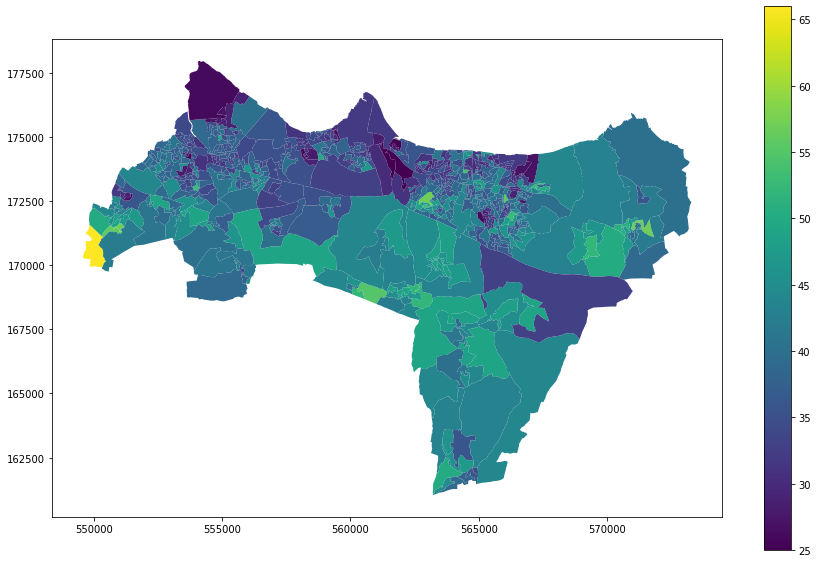

In [15]:
# Mean age
# New ONS tables
sql = '''
select a.*, oa.*, a.value as x
from  censusdata as a
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS102EW0018'
and "LAD16NM" in ('Gravesham','Dartford')
order by x desc
'''
df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(15, 10), legend=True)

In [16]:
df

geographycode          key  value     type  OBJECTID     OA11CD  \
0       E00122610  KS102EW0018     66  KS102EW    119260  E00122610   
1       E00123209  KS102EW0018     57  KS102EW    119852  E00123209   
2       E00123295  KS102EW0018     57  KS102EW    119936  E00123295   
3       E00123207  KS102EW0018     57  KS102EW    119850  E00123207   
4       E00122621  KS102EW0018     57  KS102EW    119270  E00122621   
..            ...          ...    ...      ...       ...        ...   
624     E00167429  KS102EW0018     26  KS102EW    162823  E00167429   
625     E00167426  KS102EW0018     25  KS102EW    162820  E00167426   
626     E00167431  KS102EW0018     25  KS102EW    162825  E00167431   
627     E00123264  KS102EW0018     25  KS102EW    119906  E00123264   
628     E00167471  KS102EW0018     25  KS102EW    162865  E00167471   

       LAD11CD    LAD16CD    LAD16NM     Shape__Are   Shape__Len  \
0    E07000107  E07000107   Dartford  840281.277557  4913.157356   
1    E07000109  E07000109  Gravesham  185151.192703  3191.399801   
2    E07000109  E07000109  Gravesham  161697.394951  2358.219187   
3    E07000109  E07000109  Gravesham   52382.659401  1428.800199   
4    E07000107  E07000107   Dartford   60856.120491  1503.776535   
..         ...        ...        ...            ...          ...   
624  E07000107  E07000107   Dartford   43441.902428  1086.251714   
625  E07000107  E07000107   Dartford   28134.884705   934.715971   
626  E07000107  E07000107   Dartford  262147.437881  3781.887269   
627  E07000109  E07000109  Gravesham  112901.933250  1920.017241   
628  E07000109  E07000109  Gravesham  491612.320847  5001.873414   

                                              geometry   x  
0    POLYGON ((550334.030 171109.357, 550333.663 17...  66  
1    POLYGON ((571280.268 171408.181, 571273.673 17...  57  
2    POLYGON ((563196.435 172854.170, 563195.845 17...  57  
3    POLYGON ((571229.056 171743.413, 571229.983 17...  57  
4    POLYGON ((551166.000 171461.000, 551160.000 17...  57  
..                                                 ...  ..  
624  POLYGON ((558233.624 174274.980, 558229.302 17...  26  
625  POLYGON ((553800.420 174324.773, 553800.750 17...  25  
626  POLYGON ((561433.625 174546.297, 561433.745 17...  25  
627  POLYGON ((561854.833 174876.667, 561890.195 17...  25  
628  POLYGON ((561541.405 174481.566, 561550.220 17...  25  

[629 rows x 13 columns]

<AxesSubplot:>

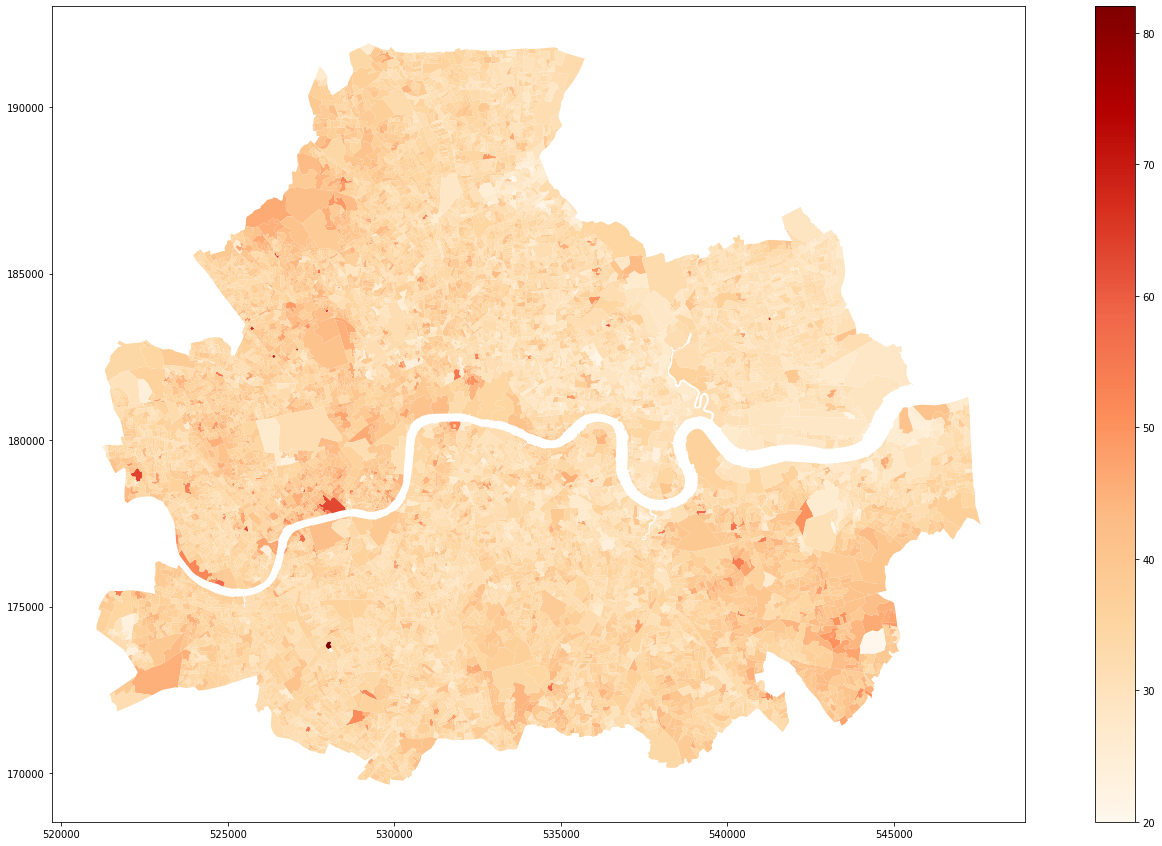

In [18]:

sql = '''
select a.*, oa.*, a.value as x
from  censusdata as a
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS102EW0018'
and "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by x desc
'''


df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(25, 15), legend=True, cmap='OrRd')

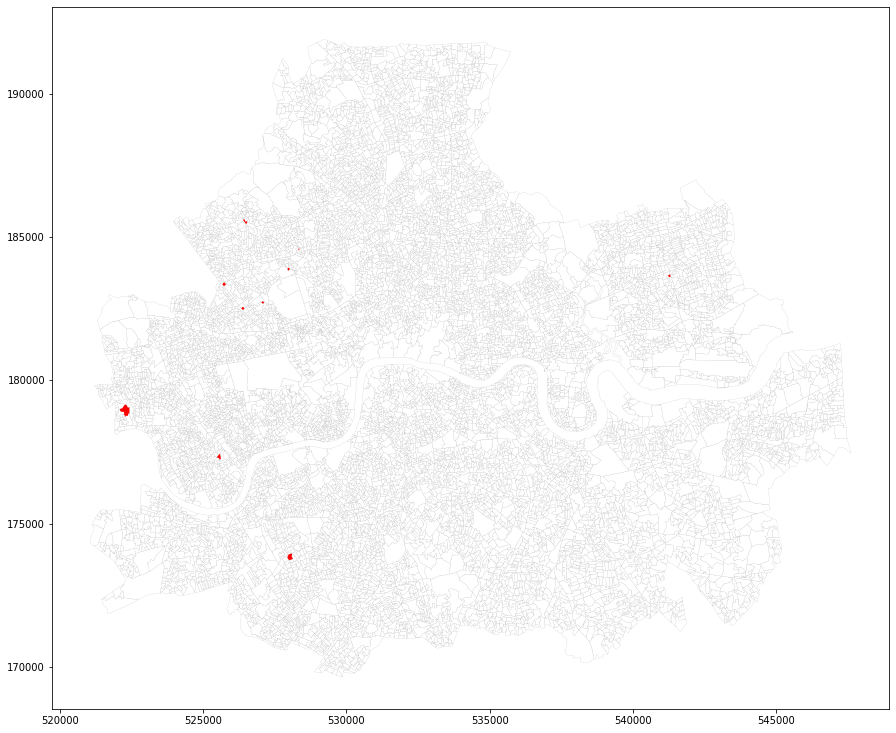

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  

# plt.figure(figsize=(6, 6), dpi = 80)
fig, ax = plt.subplots(figsize=(15,15))

ax.set_aspect('equal')

df.plot(ax=ax, color='white', edgecolor='gray',linewidth=0.1)
df.head(10).plot(ax=ax,  color='red')


plt.show()

In [96]:
#Highest mean age in London
df.head(10)

geographycode          key  value     type  OBJECTID     OA11CD    LAD11CD  \
0     E00022899  KS102EW0018     82  KS102EW     22227  E00022899  E09000032   
1     E00004464  KS102EW0018     72  KS102EW      4372  E00004464  E09000007   
2     E00023911  KS102EW0018     70  KS102EW     23198  E00023911  E09000033   
3     E00004611  KS102EW0018     67  KS102EW      4518  E00004611  E09000007   
4     E00004202  KS102EW0018     67  KS102EW      4114  E00004202  E09000007   
5     E00023900  KS102EW0018     66  KS102EW     23187  E00023900  E09000033   
6     E00017668  KS102EW0018     66  KS102EW     17230  E00017668  E09000025   
7     E00009664  KS102EW0018     64  KS102EW      9399  E00009664  E09000013   
8     E00004430  KS102EW0018     64  KS102EW      4341  E00004430  E09000007   
9     E00014596  KS102EW0018     63  KS102EW     14209  E00014596  E09000020   

     LAD16CD                 LAD16NM     Shape__Are   Shape__Len  \
0  E09000032              Wandsworth   28442.205017   754.075936   
1  E09000007                  Camden    1463.004791   152.480348   
2  E09000033             Westminster    6320.183846   318.180853   
3  E09000007                  Camden    8681.234734   383.587286   
4  E09000007                  Camden    4587.478676   301.878217   
5  E09000033             Westminster    4483.406662   298.715193   
6  E09000025                  Newham    5122.754738   289.282294   
7  E09000013  Hammersmith and Fulham   78270.870216  1341.162240   
8  E09000007                  Camden    8511.030632   518.388130   
9  E09000020  Kensington and Chelsea  233731.246452  2772.491035   

                                            geometry   x  
0  POLYGON ((528104.897 173926.462, 528098.375 17...  82  
1  POLYGON ((528343.308 184547.229, 528341.446 18...  72  
2  POLYGON ((526441.994 182502.403, 526441.465 18...  70  
3  POLYGON ((525751.871 183404.074, 525751.727 18...  67  
4  POLYGON ((527994.062 183918.003, 528018.606 18...  67  
5  POLYGON ((527130.695 182711.183, 527106.792 18...  66  
6  POLYGON ((541318.000 183624.000, 541319.000 18...  66  
7  POLYGON ((522425.493 178841.948, 522387.607 17...  64  
8  POLYGON ((526521.568 185555.256, 526542.143 18...  64  
9  POLYGON ((528029.312 178240.861, 528031.399 17...  63

<AxesSubplot:>

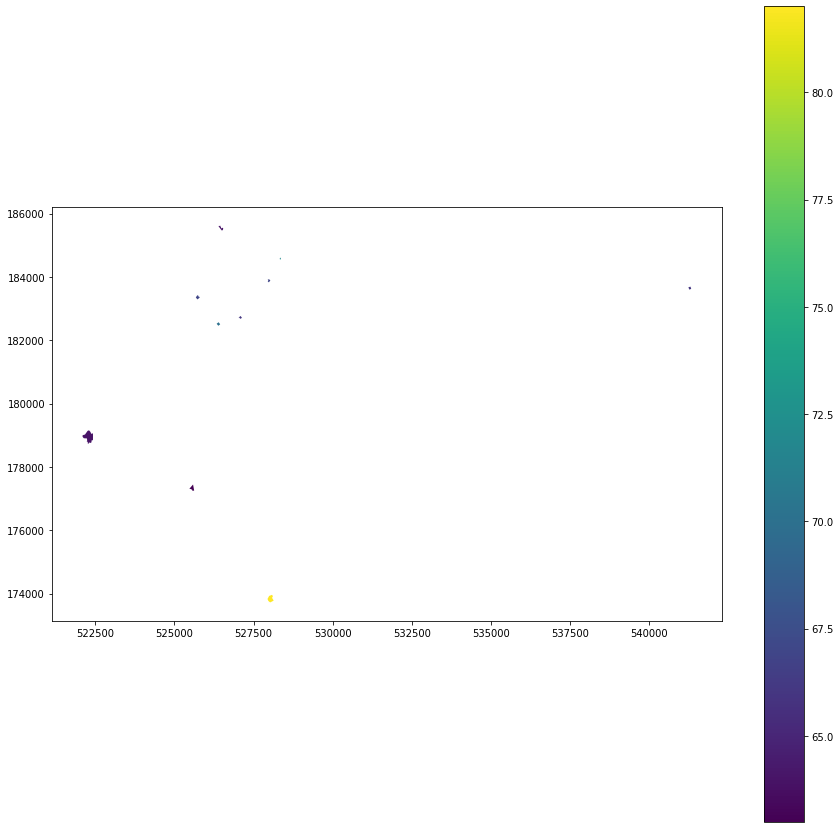

In [20]:
#Highest mean age in London
df.head(10).plot(column='x', figsize=(15, 15), legend=True)



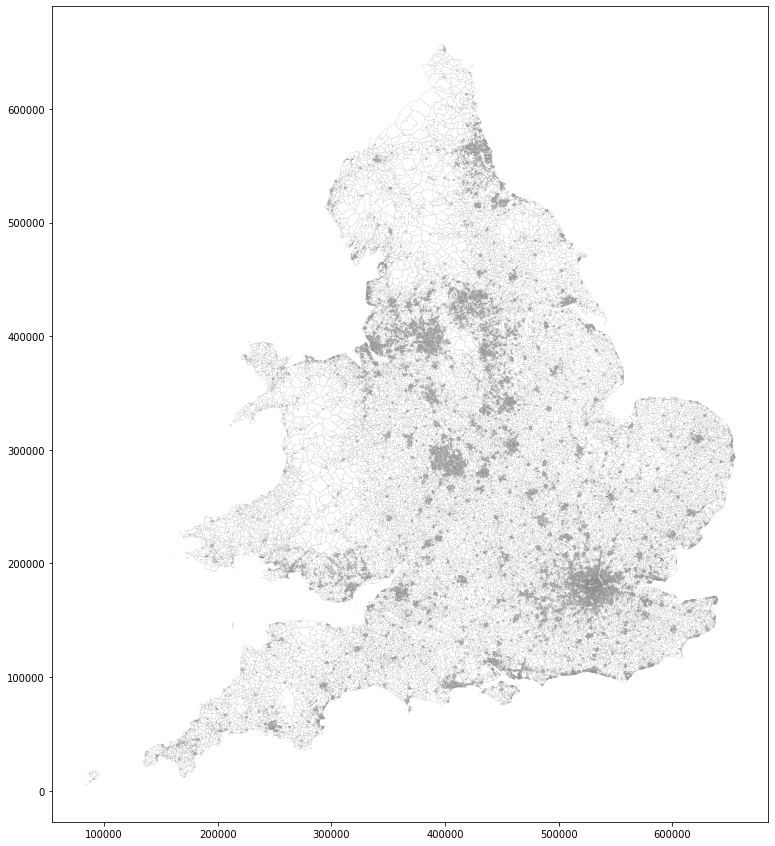

In [22]:
sql = '''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS501EW0001'
and b.key ='KS501EW0007'
order by x desc
'''

import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax = plt.subplots(figsize=(15,15))

ax.set_aspect('equal')

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry')

df.plot(ax=ax, color='white', edgecolor='gray',linewidth=0.1)
df.head(50).plot(ax=ax,  color='red')


plt.show()

 
# df.plot(column='x', figsize=(15, 15), legend=True, cmap='OrRd')

In [23]:
# area E00167063 has a population where over 92% of adults hold a degree or equivalent
# Most 'educated'?
# Area is in Cambridge
df.head(10)

geographycode          key  value     type geographycode          key  \
0     E00167063  KS501EW0001    178  KS501EW     E00167063  KS501EW0007   
1     E00168080  KS501EW0001    169  KS501EW     E00168080  KS501EW0007   
2     E00168026  KS501EW0001    216  KS501EW     E00168026  KS501EW0007   
3     E00174673  KS501EW0001    109  KS501EW     E00174673  KS501EW0007   
4     E00167477  KS501EW0001    218  KS501EW     E00167477  KS501EW0007   
5     E00021546  KS501EW0001    172  KS501EW     E00021546  KS501EW0007   
6     E00167064  KS501EW0001    198  KS501EW     E00167064  KS501EW0007   
7     E00145612  KS501EW0001    400  KS501EW     E00145612  KS501EW0007   
8     E00019812  KS501EW0001    195  KS501EW     E00019812  KS501EW0007   
9     E00167362  KS501EW0001    197  KS501EW     E00167362  KS501EW0007   

   value     type          x  OBJECTID     OA11CD    LAD11CD    LAD16CD  \
0    164  KS501EW  92.134831    162487  E00167063  E07000008  E07000008   
1    155  KS501EW  91.715976    163435  E00168080  E09000028  E09000028   
2    192  KS501EW  88.888889    163382  E00168026  E09000028  E09000028   
3     96  KS501EW  88.073394    169319  E00174673  E09000007  E09000007   
4    191  KS501EW  87.614679    162871  E00167477  E09000028  E09000028   
5    150  KS501EW  87.209302     20932  E00021546  E09000030  E09000030   
6    172  KS501EW  86.868687    162488  E00167064  E07000008  E07000008   
7    346  KS501EW  86.500000    141711  E00145612  E07000178  E07000178   
8    168  KS501EW  86.153846     19292  E00019812  E09000028  E09000028   
9    169  KS501EW  85.786802    162763  E00167362  E07000008  E07000008   

         LAD16NM     Shape__Are   Shape__Len  \
0      Cambridge  439665.215134  2752.475706   
1      Southwark    9656.750076   393.244754   
2      Southwark   23717.680061   673.880739   
3         Camden    5132.098099   287.739553   
4      Southwark    7809.999313   377.560984   
5  Tower Hamlets    8959.539497   388.282990   
6      Cambridge  901480.335999  5971.984545   
7         Oxford  263773.701073  2694.022323   
8      Southwark   16325.526443   558.028114   
9      Cambridge  134609.118301  1809.155508   

                                            geometry  
0  POLYGON ((542985.063 258817.594, 542985.750 25...  
1  POLYGON ((532658.180 179288.865, 532655.066 17...  
2  POLYGON ((533440.112 179582.685, 533435.159 17...  
3  POLYGON ((527424.625 185412.531, 527451.188 18...  
4  POLYGON ((533885.977 179865.942, 533884.783 17...  
5  POLYGON ((537063.262 179811.860, 537068.588 17...  
6  POLYGON ((543519.374 259155.228, 543519.172 25...  
7  POLYGON ((451925.050 208777.989, 451923.678 20...  
8  POLYGON ((532496.908 179475.054, 532496.115 17...  
9  POLYGON ((545480.125 256732.859, 545483.813 25...

<AxesSubplot:>

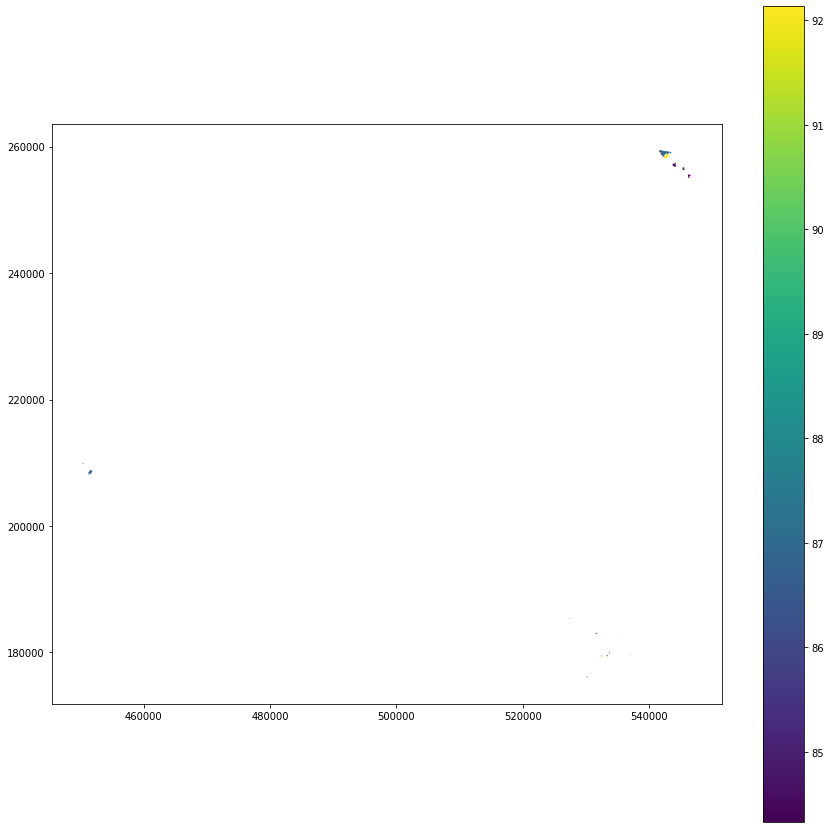

In [24]:
df.head(20).plot(column='x', figsize=(15, 15), legend=True)

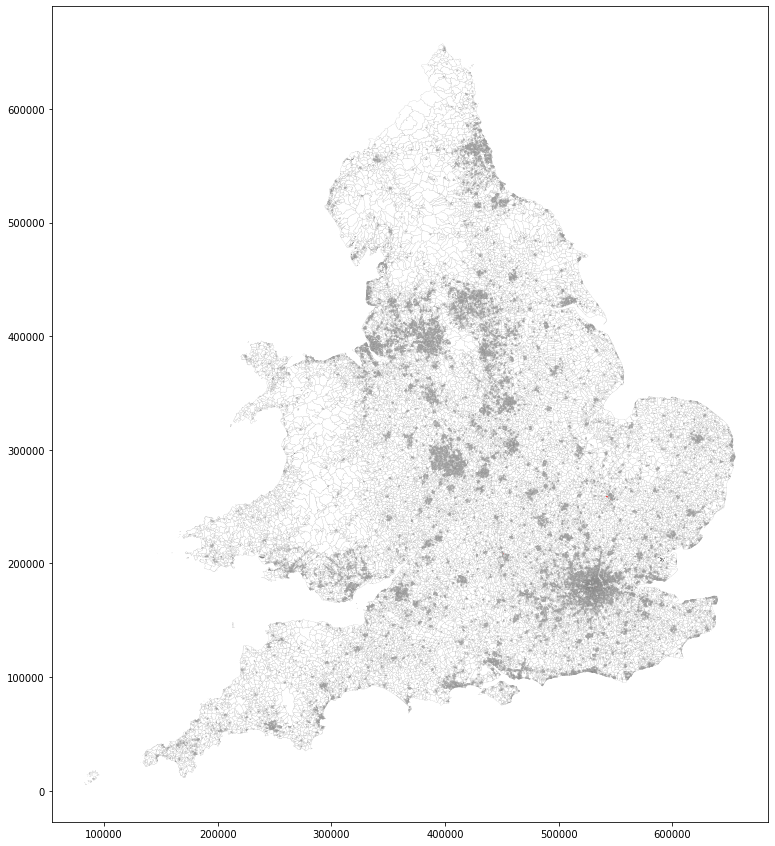

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  

# plt.figure(figsize=(6, 6), dpi = 80)
fig, ax = plt.subplots(figsize=(15,15))

ax.set_aspect('equal')

df.plot(ax=ax, color='white', edgecolor='gray',linewidth=0.1)
df.head(10).plot(ax=ax,  color='red')


plt.show()

In [26]:
# area E00167063 has a population where over 92% of adults hold a degree or equivalent
# Least 'educated'?
df.tail(10)

geographycode          key  value     type geographycode          key  \
181398     E00060965  KS501EW0001    238  KS501EW     E00060965  KS501EW0007   
181399     E00167555  KS501EW0001     85  KS501EW     E00167555  KS501EW0007   
181400     E00174000  KS501EW0001    190  KS501EW     E00174000  KS501EW0007   
181401     E00059392  KS501EW0001    206  KS501EW     E00059392  KS501EW0007   
181402     E00065063  KS501EW0001    103  KS501EW     E00065063  KS501EW0007   
181403     E00064953  KS501EW0001    211  KS501EW     E00064953  KS501EW0007   
181404     E00070048  KS501EW0001    109  KS501EW     E00070048  KS501EW0007   
181405     E00064685  KS501EW0001    112  KS501EW     E00064685  KS501EW0007   
181406     E00059079  KS501EW0001     86  KS501EW     E00059079  KS501EW0007   
181407     E00051931  KS501EW0001    113  KS501EW     E00051931  KS501EW0007   

        value     type         x  OBJECTID     OA11CD    LAD11CD    LAD16CD  \
181398      3  KS501EW  1.260504     59104  E00060965  E06000002  E06000002   
181399      1  KS501EW  1.176471    162939  E00167555  E07000106  E07000106   
181400      2  KS501EW  1.052632    168757  E00174000  E07000069  E07000069   
181401      2  KS501EW  0.970874     57576  E00059392  E08000036  E08000036   
181402      1  KS501EW  0.970874     63055  E00065063  E06000010  E06000010   
181403      2  KS501EW  0.947867     62949  E00064953  E06000010  E06000010   
181404      1  KS501EW  0.917431     67896  E00070048  E06000018  E06000018   
181405      1  KS501EW  0.892857     62693  E00064685  E06000010  E06000010   
181406      0  KS501EW  0.000000     57266  E00059079  E08000035  E08000035   
181407      0  KS501EW  0.000000     50347  E00051931  E08000030  E08000030   

                            LAD16NM    Shape__Are   Shape__Len  \
181398                Middlesbrough  44041.506317  1069.786769   
181399                   Canterbury   9572.402229   417.838106   
181400                 Castle Point  65886.605354  1915.818430   
181401                    Wakefield  74383.963089  1828.280514   
181402  Kingston upon Hull, City of  94621.944748  1489.555164   
181403  Kingston upon Hull, City of  36013.539200  1231.893250   
181404                   Nottingham  11318.632996   555.144601   
181405  Kingston upon Hull, City of  43557.009094   932.013437   
181406                        Leeds  29887.405380  1154.431360   
181407                      Walsall  82856.723244  2294.430668   

                                                 geometry  
181398  POLYGON ((452851.094 518601.605, 452851.890 51...  
181399  POLYGON ((616493.821 157732.707, 616476.116 15...  
181400  POLYGON ((581171.139 183919.860, 581168.000 18...  
181401  POLYGON ((442093.469 419987.686, 442108.524 41...  
181402  POLYGON ((513927.536 430816.960, 513927.738 43...  
181403  POLYGON ((507001.040 432914.572, 507002.500 43...  
181404  POLYGON ((453959.352 344523.584, 453958.247 34...  
181405  POLYGON ((513573.206 432343.794, 513573.321 43...  
181406  POLYGON ((436678.003 436617.999, 436668.254 43...  
181407  POLYGON ((401391.000 301704.000, 401390.001 30...

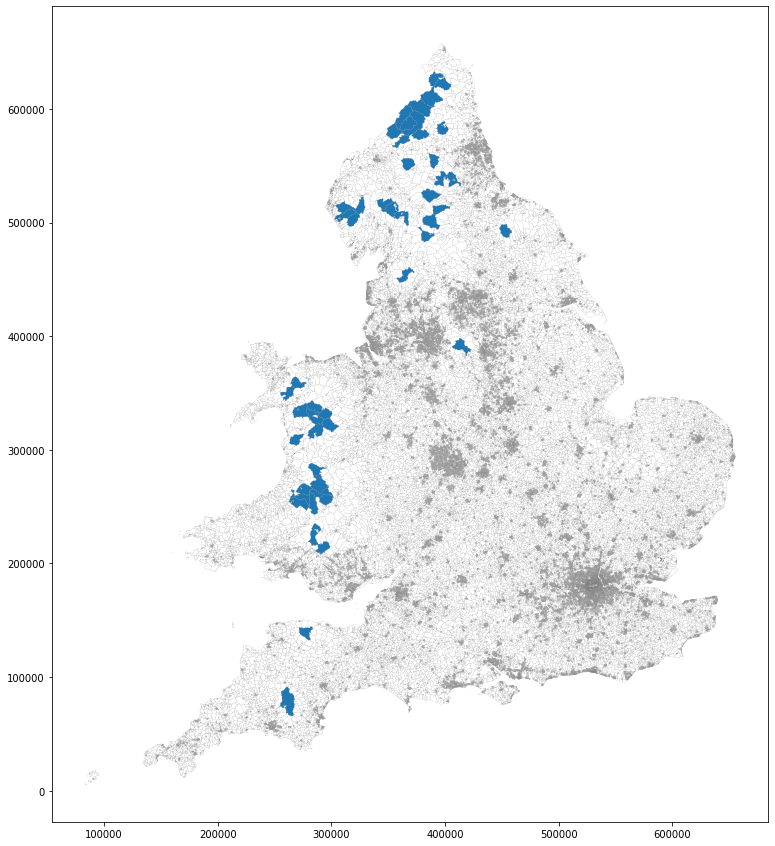

In [27]:
# How about gettting size of OAs in order for England 
# Could this be a way to identify the least densly populated areas?

import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

sql = '''
select * 
from "OA" as oa
order by "Shape__Are" desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 

df.plot(ax=ax, color='white', edgecolor='gray',linewidth=0.1)
df.head(50).plot(ax=ax,  edgecolor='gray', linewidth=0.1, legend=True)


plt.show()
# df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 


In [28]:
df

OBJECTID     OA11CD    LAD11CD    LAD16CD                 LAD16NM  \
0         100057  E00102963  E07000047  E07000047              West Devon   
1         136245  E00140010  E06000048  E06000057          Northumberland   
2         136217  E00139982  E06000048  E06000057          Northumberland   
3         135484  E00139236  E06000048  E06000057          Northumberland   
4         136244  E00140009  E06000048  E06000057          Northumberland   
...          ...        ...        ...        ...                     ...   
181403    170357  E00175759  E08000025  E08000025              Birmingham   
181404    165010  E00169799  E08000035  E08000035                   Leeds   
181405     13961  E00014344  E09000020  E09000020  Kensington and Chelsea   
181406    170314  E00175716  E08000025  E08000025              Birmingham   
181407    169846  E00175248  E09000033  E09000033             Westminster   

          Shape__Are    Shape__Len  \
0       2.016620e+08  85294.584328   
1       1.876372e+08  97309.203944   
2       1.791973e+08  74784.771875   
3       1.790735e+08  75621.889854   
4       1.438120e+08  74286.631950   
...              ...           ...   
181403  7.473402e+02    122.167024   
181404  4.079813e+02    103.247041   
181405  2.012486e+02     58.646158   
181406  1.810649e+02    125.331805   
181407  1.618563e+02     83.308583   

                                                 geometry  
0       POLYGON ((261758.469 90935.461, 261800.000 908...  
1       POLYGON ((372947.097 598333.039, 372950.594 59...  
2       POLYGON ((379230.594 608263.125, 379247.813 60...  
3       POLYGON ((398441.487 608616.169, 398280.187 60...  
4       POLYGON ((367133.594 603302.626, 367233.094 60...  
...                                                   ...  
181403  POLYGON ((407698.944 285133.983, 407691.000 28...  
181404  POLYGON ((428968.533 433301.530, 428964.400 43...  
181405  POLYGON ((527315.932 178625.068, 527315.000 17...  
181406  POLYGON ((406121.500 286456.027, 406119.692 28...  
181407  POLYGON ((529552.382 179187.057, 529570.566 17...  

[181408 rows x 8 columns]

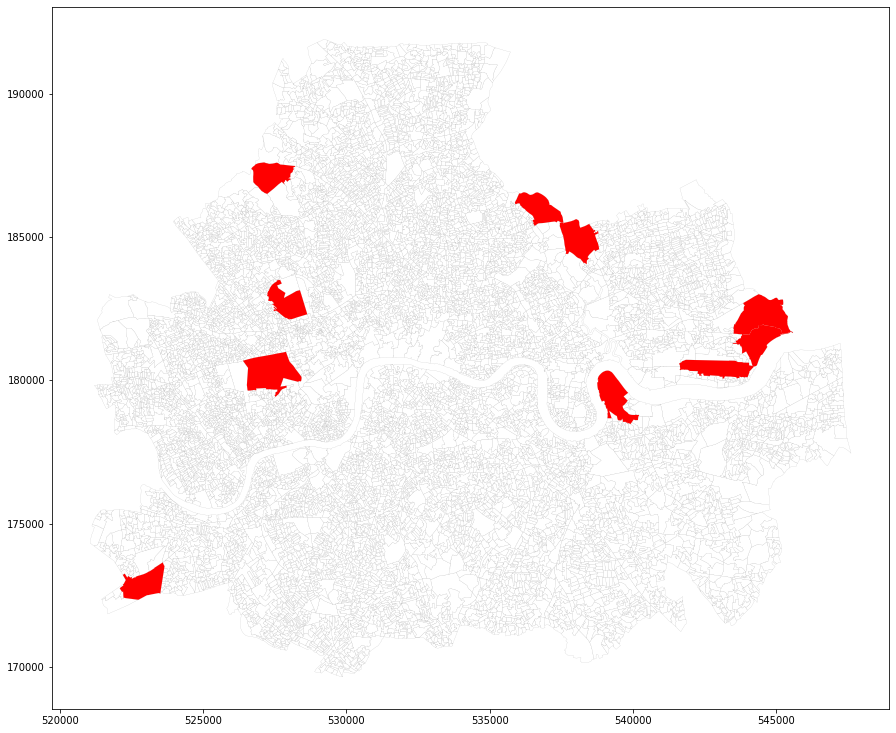

In [29]:
# 10 largest OAs in London

import matplotlib.pyplot as plt
%matplotlib inline  

# plt.figure(figsize=(6, 6), dpi = 80)
fig, ax = plt.subplots(figsize=(15,15))

ax.set_aspect('equal')



sql = '''
select * 
from "OA" as oa
where "LAD16NM" in ('Lewisham','Haringey','Lambeth','Southwark','Kensington and Chelsea','Hammersmith and Fulham',
'Camden','Greenwich','Wandsworth','Haringey','Newham','City of London','Islington', 'Barking & Dagenham',
'Tower Hamlets','Hackney','Westminster')
order by "Shape__Are" desc
'''

df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 

df.plot(ax=ax, color='white', edgecolor='gray',linewidth=0.1)
df.head(10).plot(ax=ax,  color='red')


plt.show()
# df.plot(figsize=(15, 15), legend=True)

<AxesSubplot:>

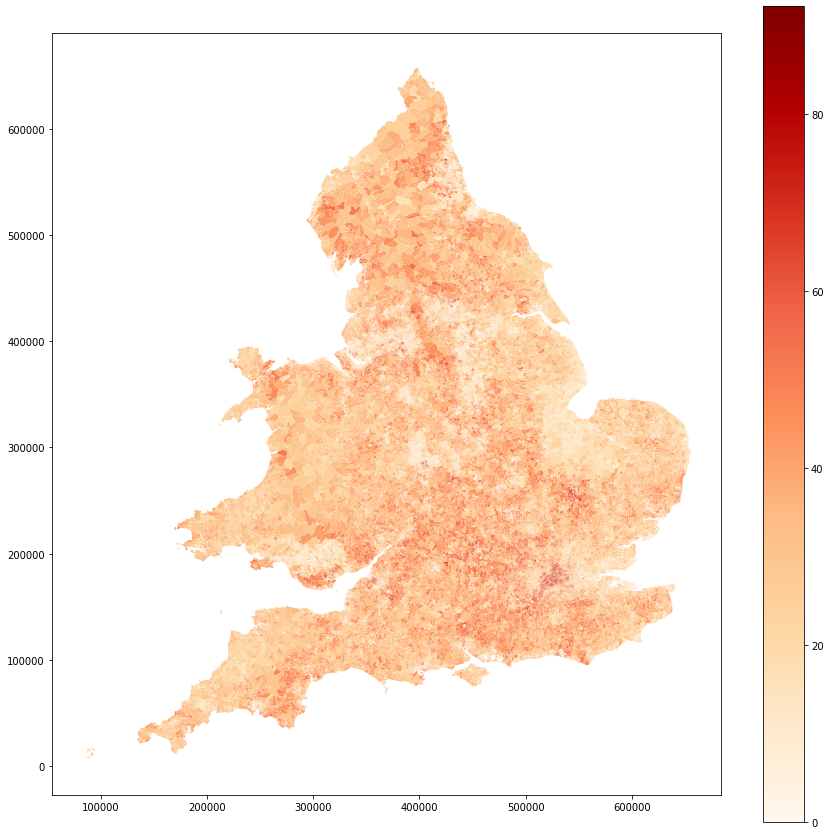

In [30]:
# Highest educate area
# Using KS501EW0007 (Level 4 qualifications)
# Level 4 and above: Degree (for example BA, BSc), Higher Degree (for example MA, PhD, PGCE), NVQ Level 4-5, 
# HNC, HND, RSA Higher Diploma, BTEC Higher level, Foundation degree (NI), Professional qualifications (for
# example teaching, nursing, accountancy)

sql = '''
select a.*, b.*, (cast (b.value as float) /a.value)*100 x, oa.*
from  censusdata as a
inner join censusdata as b
on b.geographycode = a.geographycode
inner join "OA" as oa
on a.geographycode = oa."OA11CD"
and a.key = 'KS501EW0001'
and b.key ='KS501EW0007'
order by x desc
'''


df = geopandas.GeoDataFrame.from_postgis(sql, connection, geom_col='geometry') 
df.plot(column='x', figsize=(15, 15), legend=True, cmap='OrRd')